## Project Overview
A comprehensive machine learning-based system for predicting heart disease using cardiovascular health indicators with advanced model comparison. This project leverages **Supervised Machine Learning** algorithms across seven different models to identify the optimal approach for accurate predictions, supporting healthcare professionals in making informed decisions.

Industry: Healthcare

### IMPORT THE DEPENDENCIES

In [3]:
# Import the needed libraries

# For Data Analysis
import pandas as pd
import numpy as np

# For Data Visiualization
import matplotlib.pyplot as plt
import seaborn as sns

# For Data Pre-Processing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Machine Learning Models
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
# from xgboost import XGBClassifier # !pip install xgboost
from sklearn.svm import LinearSVC, SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

# Evaluation Metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix

# For Warnings
import warnings
warnings.filterwarnings("ignore")


### DATA COLLECTION AND DATA PROCESSING

In [5]:
# Load The Dataset to PandaFrame
Heart_Disease_Predict = pd.read_csv('heart.csv')

In [6]:
# View the first five row of the dataset
Heart_Disease_Predict.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [7]:
# For better understanding and flow of Analysis, I will rename some of the columns
Heart_Disease_Predict.columns = ['Age', 'Sex', 'Chest_Pain_Type', 'Resting_Blood_Pressure', 'Cholesterol', 'Fasting_Blood_Sugar', 'Rest_ECG',
'Maximum_Heart_Rate', 'Exercise_Induced_Angina', 'ST_Depression', 'ST_Slope_Peak', 'Number_Of_Major_Vessel', 'Thalassemia', 'Target']

In [8]:
# View the first five row of the dataset
Heart_Disease_Predict.head()

,Age,Sex,Chest_Pain_Type,Resting_Blood_Pressure,Cholesterol,Fasting_Blood_Sugar,Rest_ECG,Maximum_Heart_Rate,Exercise_Induced_Angina,ST_Depression,ST_Slope_Peak,Number_Of_Major_Vessel,Thalassemia,Target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [9]:
# Check the full information about the dataset
Heart_Disease_Predict.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      303 non-null    int64  
 1   Sex                      303 non-null    int64  
 2   Chest_Pain_Type          303 non-null    int64  
 3   Resting_Blood_Pressure   303 non-null    int64  
 4   Cholesterol              303 non-null    int64  
 5   Fasting_Blood_Sugar      303 non-null    int64  
 6   Rest_ECG                 303 non-null    int64  
 7   Maximum_Heart_Rate       303 non-null    int64  
 8   Exercise_Induced_Angina  303 non-null    int64  
 9   ST_Depression            303 non-null    float64
 10  ST_Slope_Peak            303 non-null    int64  
 11  Number_Of_Major_Vessel   303 non-null    int64  
 12  Thalassemia              303 non-null    int64  
 13  Target                   303 non-null    int64  
dtypes: float64(1), int64(13)
m

In [10]:
# Unique data in every feature
{x: len(Heart_Disease_Predict[x].unique()) for x in Heart_Disease_Predict.columns}

{'Age': 41,
 'Sex': 2,
 'Chest_Pain_Type': 4,
 'Resting_Blood_Pressure': 49,
 'Cholesterol': 152,
 'Fasting_Blood_Sugar': 2,
 'Rest_ECG': 3,
 'Maximum_Heart_Rate': 91,
 'Exercise_Induced_Angina': 2,
 'ST_Depression': 40,
 'ST_Slope_Peak': 3,
 'Number_Of_Major_Vessel': 5,
 'Thalassemia': 4,
 'Target': 2}

In [11]:
# Check the staistical values of the dataset
Heart_Disease_Predict.describe()

,Age,Sex,Chest_Pain_Type,Resting_Blood_Pressure,Cholesterol,Fasting_Blood_Sugar,Rest_ECG,Maximum_Heart_Rate,Exercise_Induced_Angina,ST_Depression,ST_Slope_Peak,Number_Of_Major_Vessel,Thalassemia,Target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


Age                        0
Sex                        0
Chest_Pain_Type            0
Resting_Blood_Pressure     0
Cholesterol                0
Fasting_Blood_Sugar        0
Rest_ECG                   0
Maximum_Heart_Rate         0
Exercise_Induced_Angina    0
ST_Depression              0
ST_Slope_Peak              0
Number_Of_Major_Vessel     0
Thalassemia                0
Target                     0
dtype: int64


<Axes: >

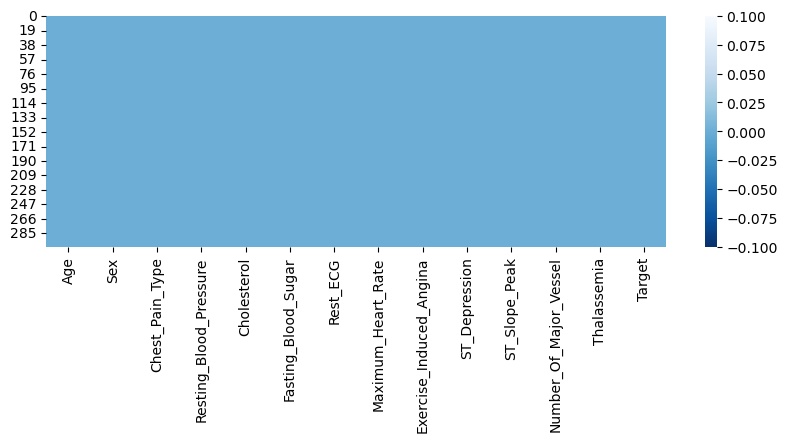

In [12]:
# Check for missing values
print(Heart_Disease_Predict.isnull().sum())

# Visualizing the missing data
plt.figure(figsize = (10, 3))
sns.heatmap(Heart_Disease_Predict.isnull(), cbar=True, cmap='Blues_r')

#### There are no missing values in the visualization above

### EXPLORATORY DATA ANALYSIS

#### UNIVARIATE ANALYSIS

In [14]:
Heart_Disease_Predict.columns

Index(['Age', 'Sex', 'Chest_Pain_Type', 'Resting_Blood_Pressure',
       'Cholesterol', 'Fasting_Blood_Sugar', 'Rest_ECG', 'Maximum_Heart_Rate',
       'Exercise_Induced_Angina', 'ST_Depression', 'ST_Slope_Peak',
       'Number_Of_Major_Vessel', 'Thalassemia', 'Target'],
      dtype='object')

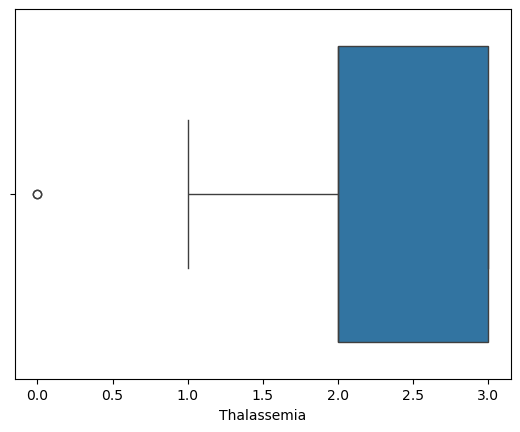

In [15]:
# Check for Outliers
sns.boxplot(x=Heart_Disease_Predict['Thalassemia']);

#### There is an outlier in the Thalassemia column

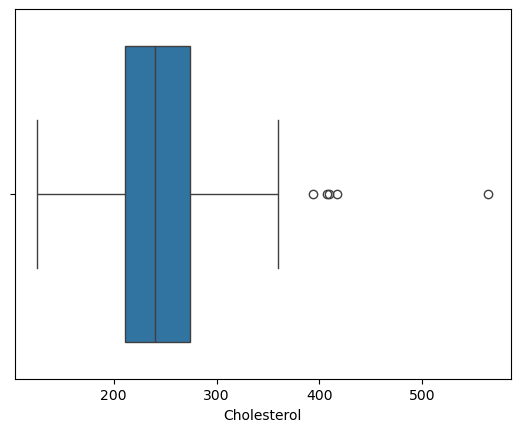

In [16]:
# Check for Outliers
sns.boxplot(x=Heart_Disease_Predict['Cholesterol']);

#### There is a couple of outliers in the Cholesterol column

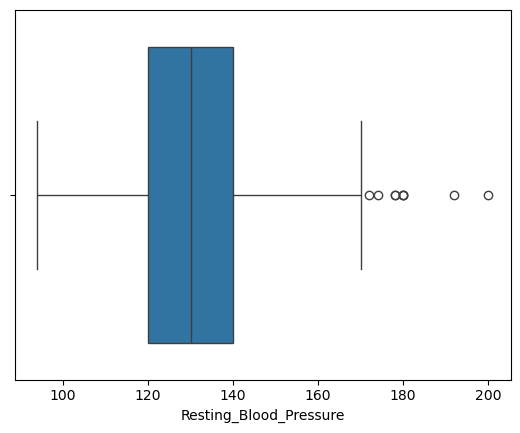

In [17]:
# Check for Outliers
sns.boxplot(x=Heart_Disease_Predict['Resting_Blood_Pressure']);

#### There is a couple of outliers in the Resting_Blood_Pressure column

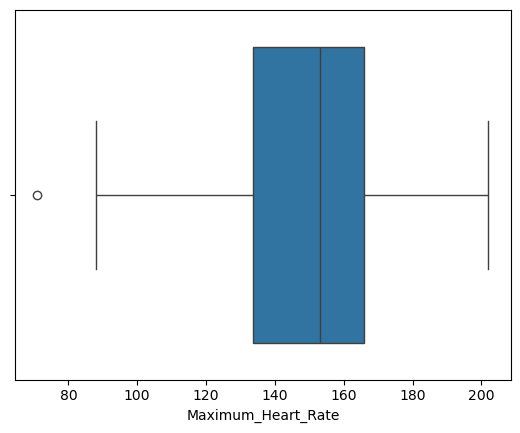

In [18]:
# Check for Outliers
sns.boxplot(x=Heart_Disease_Predict['Maximum_Heart_Rate']);

#### There is an outlier in the Maximum_Heart_Rate column

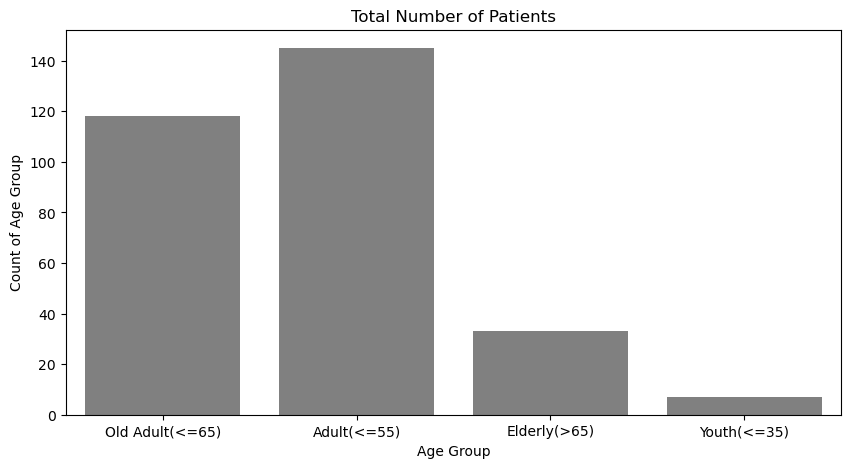

In [19]:
# Data Visualization for the (Age) column
# I also created a Functipn to visualize the agae column better
def age_bracket(Age):
    if Age <= 35:
        return "Youth(<=35)"
    elif Age <= 55:
        return "Adult(<=55)"
    elif Age <= 65:
        return "Old Adult(<=65)"
    else:
        return "Elderly(>65)"

Heart_Disease_Predict['age_bracket'] = Heart_Disease_Predict['Age'].apply(age_bracket)


# Investigating the age group of the patients
plt.figure(figsize = (10, 5))
sns.countplot(x='age_bracket', data=Heart_Disease_Predict, color='gray')
plt.xlabel('Age Group')
plt.ylabel('Count of Age Group')
plt.title('Total Number of Patients');

#### Majority of the patients are less than or equal to age 55
#### Mojority of the patients are adults.

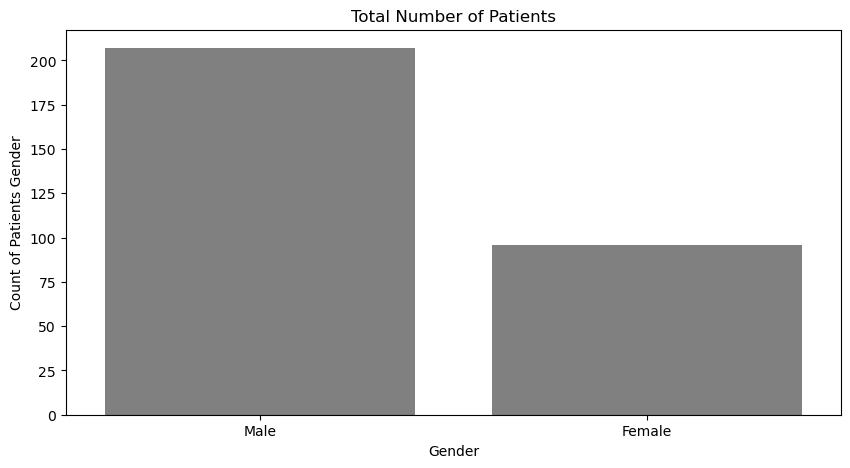

In [20]:
# Data Visualization for the (Sex) column
# I also created a Functipn to visualize the gender of the patients better
def gender(Sex):
    if Sex == 1:
        return "Male"
    else:
        return "Female"

Heart_Disease_Predict['gender'] = Heart_Disease_Predict['Sex'].apply(gender)

# Investigating the gender of the patients
plt.figure(figsize = (10, 5))
sns.countplot(x='gender', data=Heart_Disease_Predict, color='gray')
plt.xlabel('Gender')
plt.ylabel('Count of Patients Gender')
plt.title('Total Number of Patients');

#### Based on the data and visualization above, it is clear there is more male patients that female patients.

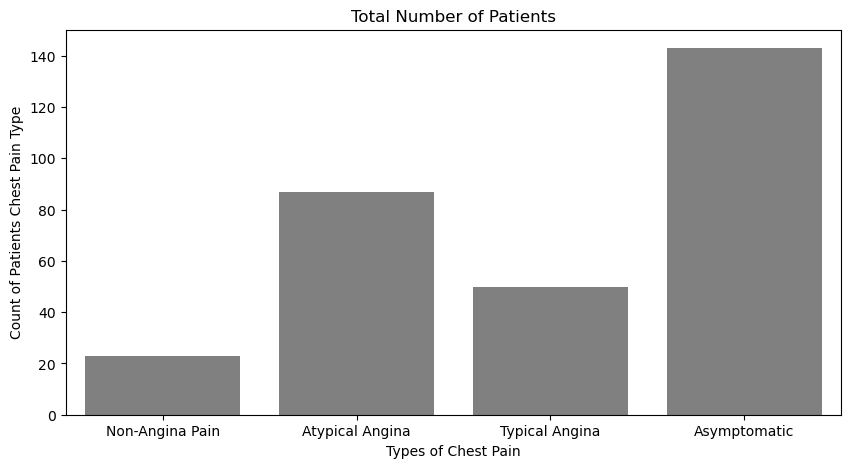

In [21]:
# Data Visualization for the (Chest Pain Type) column
# I also created a Functipn to visualize better
# Chest Pain Type (1:Typical Angina, 2: Atypical Angina, 3: Non-Angina Pain, 4: Asymptomatic)
def chest_pain(CP):
    if CP == 1:
        return "Typical Angina"
    elif CP ==2:
        return "Atypical Angina"
    elif CP ==3:
        return "Non-Angina Pain"
    else:
        return "Asymptomatic"

Heart_Disease_Predict['chest_pain'] = Heart_Disease_Predict['Chest_Pain_Type'].apply(chest_pain)

# Investigating the Chest Pain Type of the patients
plt.figure(figsize = (10, 5))
sns.countplot(x='chest_pain', data=Heart_Disease_Predict, color='gray')
plt.xlabel('Types of Chest Pain')
plt.ylabel('Count of Patients Chest Pain Type')
plt.title('Total Number of Patients');

#### Based on the data and visualization above, majority of the patients are Asymptomatic followed by Atypical Angina

label
Yes    165
No     138
Name: count, dtype: int64


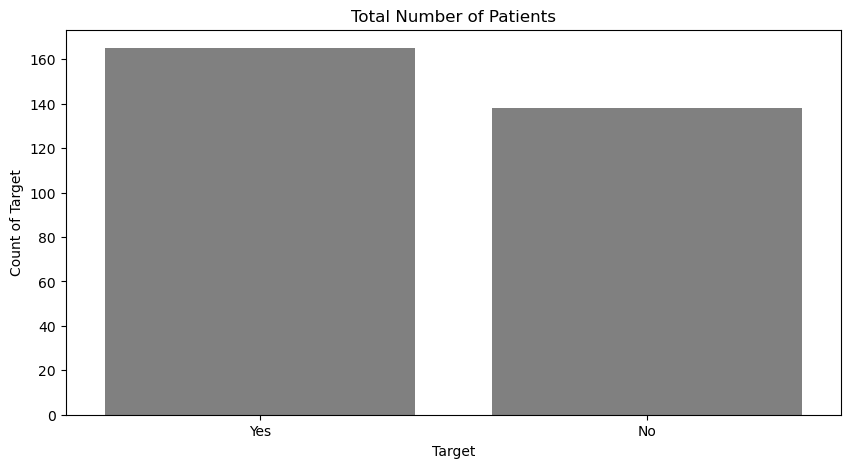

In [22]:
# Data Visualization for the (Target) column
# Target: Patient has Heart Disease or not (1=Yes, 0=No)
# I also created a Functipn to visualize better
def label(TG):
    if TG == 1:
        return "Yes"
    else:
        return "No"

Heart_Disease_Predict['label'] = Heart_Disease_Predict['Target'].apply(label)

# Total Number of Patients in each category
print(Heart_Disease_Predict['label'].value_counts())

# Investigating the Target of the patients
plt.figure(figsize = (10, 5))
sns.countplot(x='label', data=Heart_Disease_Predict, color='gray')
plt.xlabel('Target')
plt.ylabel('Count of Target')
plt.title('Total Number of Patients');

#### Based on the data and visualization above, majority of the patients have heart disease.

### BIVARIATE ANALYSIS

Text(0.5, 1.0, 'Age Group Of the Patients')

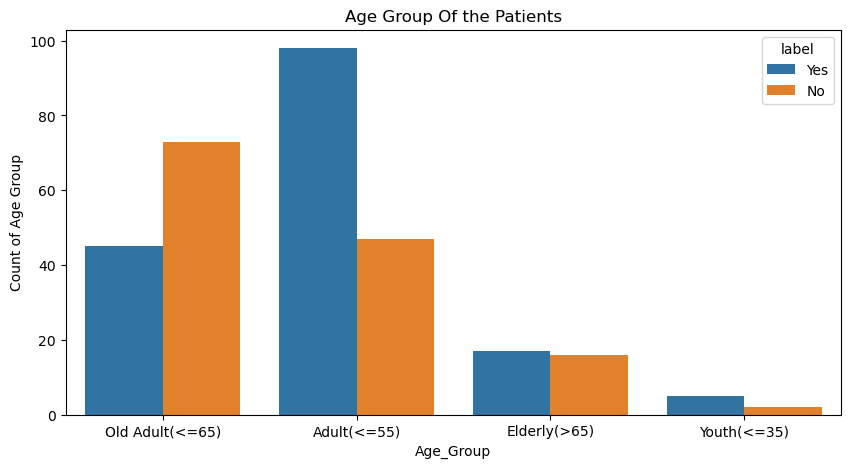

In [25]:
# Investigating the Age Group of Patients by the Target
plt.figure(figsize = (10, 5))
sns.countplot(x='age_bracket', data=Heart_Disease_Predict, hue='label')
plt.xlabel('Age_Group')
plt.ylabel('Count of Age Group')
plt.title('Age Group Of the Patients')

* #### Based on the data and visualization above, patients that are less than or equal to 65 years old do not have heart disease.
* #### Based on the data and visualization above, patients that are less than or equal to 55 years old have heart disease,

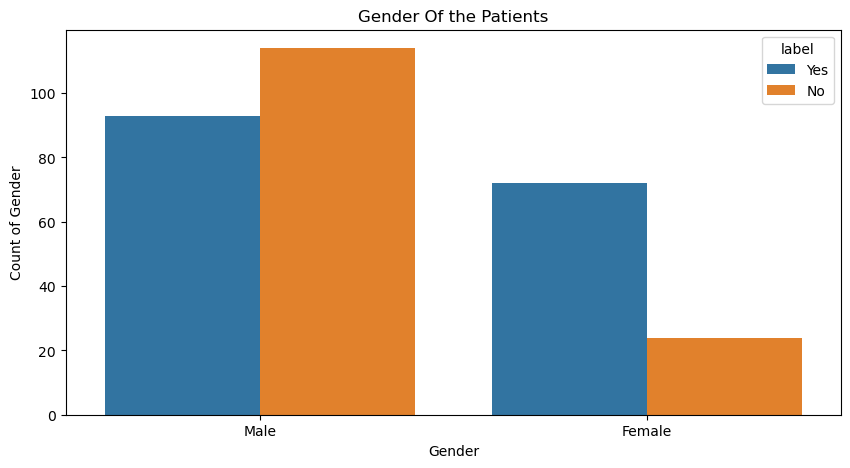

In [26]:
# Investigating the Gender of Patients by the Target
plt.figure(figsize = (10, 5))
sns.countplot(x='gender', data=Heart_Disease_Predict, hue='label')
plt.xlabel('Gender')
plt.ylabel('Count of Gender')
plt.title('Gender Of the Patients')
plt.show()

* #### Based on the data and visualization above, and also based on category, female patients have more heart disease than male patients.
* #### And in terms of proportion and category, males patients have less heart disease than female patients.

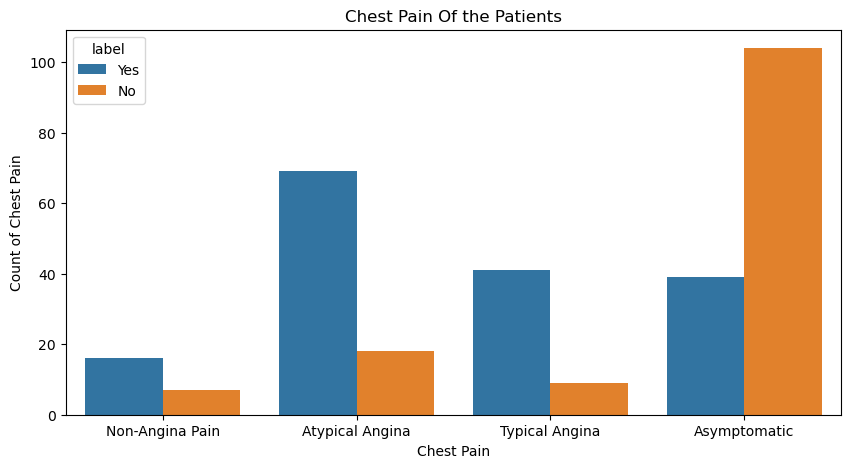

In [27]:
# Investigating the Chest Pain of Patients by the Target
plt.figure(figsize = (10, 5))
sns.countplot(x='chest_pain', data=Heart_Disease_Predict, hue='label')
plt.xlabel('Chest Pain')
plt.ylabel('Count of Chest Pain')
plt.title('Chest Pain Of the Patients')
plt.show()

* #### Based on the data and visualization above, the chest pain type that is more prone to heart disease is Atypical Angina chest pain.
* #### Based on the data and visualization above, the chest pain type that is less prone to heart disease is Asymptomatic chest pain.

### MULTIVARIATE ANALYSIS

In [29]:
# Correlation between Target and other Variable
# plt.figure(figsize = (10, 5))
# hm = sns.heatmap(Heart_Disease_Predict.corr(), cbar=True, annot=True, square=True, fmt='.2f',
                #annot_kws={'size': 10})

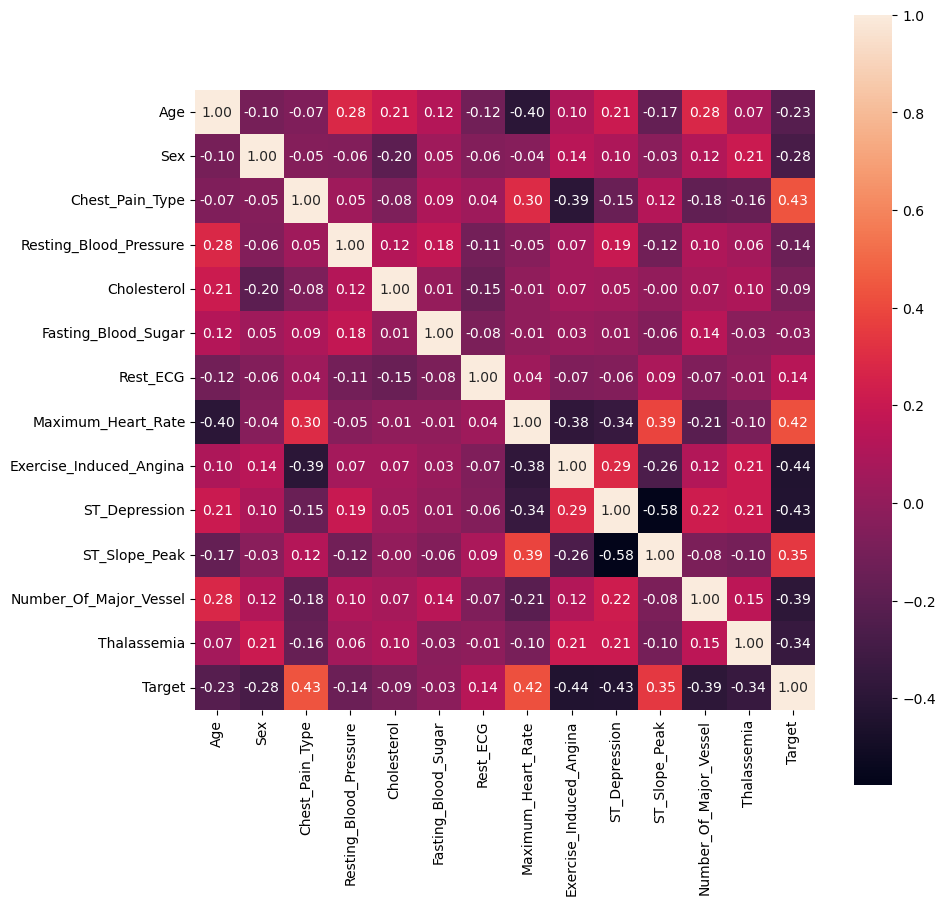

In [30]:
# Select only numeric columns
numeric_df = Heart_Disease_Predict.select_dtypes(include='number')

plt.figure(figsize=(10, 10))
hm = sns.heatmap(numeric_df.corr(), 
                 cbar=True, annot=True, square=True, fmt='.2f',
                 annot_kws={'size': 10})
plt.show()

#### Based on the data and visualization above, the relationship between the target and all the features is negative. This indicates that majority of the patients have heart disease.

### FUTURE ENGINEERING - DATA PREPROCESSING

In [32]:
# Create a copy of the dataset (Exclude the Label/Target alonside other columns that was created)
Heart_Disease_Predict_2 = Heart_Disease_Predict [['Age', 'Sex', 'Chest_Pain_Type', 'Resting_Blood_Pressure', 'Cholesterol', 'Fasting_Blood_Sugar', 'Rest_ECG',
'Maximum_Heart_Rate', 'Exercise_Induced_Angina', 'ST_Depression', 'ST_Slope_Peak', 'Number_Of_Major_Vessel', 'Thalassemia']]

# Attache the Target column to the a new variable called 'label'
label = Heart_Disease_Predict[['Target']]

In [33]:
# Dealing with Outliers = 'Resting_Blood_Pressure', 'Cholesterol', 'Thalassemia', 'Maximum_Heart_Rate'

# NORMALIZE THE DATASET
Normalize = MinMaxScaler()

In [34]:
Heart_Disease_Predict_2['Scaled_RBP'] = Normalize.fit_transform(Heart_Disease_Predict_2[['Resting_Blood_Pressure']].values.reshape(-1, 1))
Heart_Disease_Predict_2['Scaled_Chol'] = Normalize.fit_transform(Heart_Disease_Predict_2[['Cholesterol']].values.reshape(-1, 1))
Heart_Disease_Predict_2['Scaled_Thal'] = Normalize.fit_transform(Heart_Disease_Predict_2[['Thalassemia']].values.reshape(-1, 1))
Heart_Disease_Predict_2['Scaled_MHR'] = Normalize.fit_transform(Heart_Disease_Predict_2[['Maximum_Heart_Rate']].values.reshape(-1, 1))

# Drop these features because after normalizing, new features are created.
Heart_Disease_Predict_2.drop(['Resting_Blood_Pressure', 'Cholesterol', 'Thalassemia', 'Maximum_Heart_Rate'], axis=1, inplace=True)

In [35]:
# Checking the first five row of the scaled or normalized dataset
Heart_Disease_Predict_2.head()

,Age,Sex,Chest_Pain_Type,Fasting_Blood_Sugar,Rest_ECG,Exercise_Induced_Angina,ST_Depression,ST_Slope_Peak,Number_Of_Major_Vessel,Scaled_RBP,Scaled_Chol,Scaled_Thal,Scaled_MHR
0,63,1,3,1,0,0,2.3,0,0,0.481132,0.244292,0.333333,0.603053
1,37,1,2,0,1,0,3.5,0,0,0.339623,0.283105,0.666667,0.885496
2,41,0,1,0,0,0,1.4,2,0,0.339623,0.178082,0.666667,0.770992
3,56,1,1,0,1,0,0.8,2,0,0.245283,0.251142,0.666667,0.816794
4,57,0,0,0,1,1,0.6,2,0,0.245283,0.520548,0.666667,0.702290


## MACHINE LEARNING

In [37]:
# Split the Dataset into Training and Testing sets - X = Questions, Y = Answers
X_train, X_test, y_train, y_test = train_test_split(Heart_Disease_Predict_2, label, test_size = 0.2, random_state= 42)

In [38]:
# Checking the shape of the splitted dataset
print(Heart_Disease_Predict_2.shape, X_train.shape, X_test.shape)

(303, 13) (242, 13) (61, 13)


## MODEL BUILDING

1. ### LOGISTIC REGRESSION MODEL

In [40]:
# Building The Model Using LOGISTIC REGRESSION
Logistic_Model = LogisticRegression()

In [41]:
# Fit the (X_train) and (y_train) to the model
Logistic_Model.fit(X_train, y_train)

LogisticRegression()

In [42]:
# Predict(X_test)
Log_Predict = Logistic_Model.predict(X_test)

In [43]:
print("Logistic Regression")
print("Accuracy", accuracy_score(y_test, Log_Predict))
print("Precision", precision_score(y_test, Log_Predict))
print("Recall", recall_score(y_test, Log_Predict))
print("F1-Score", f1_score(y_test, Log_Predict))
print("ROC-AUC", roc_auc_score(y_test, Log_Predict))


Logistic Regression
Accuracy 0.8360655737704918
Precision 0.8666666666666667
Recall 0.8125
F1-Score 0.8387096774193549
ROC-AUC 0.8372844827586207


* #### After building the model using Logistic Regression and testing, the prediction looks encouraging. The Accuracy score is %83, Precision score is %86, F1-score is %83.
* #### This is an indication our model is working fine.

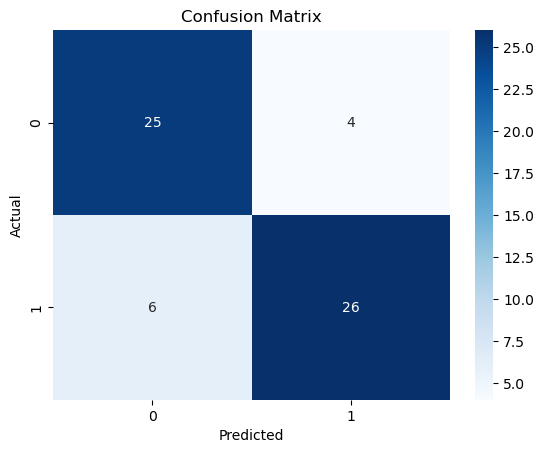

In [44]:
# Create a Confusion Matrix
CM = confusion_matrix(y_test, Log_Predict)

# Visualize the Confusion Matrix
sns.heatmap(CM, annot=True, cmap="Blues", fmt="g")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

#### From the Confusion Matrix Visualization above, it correctly predicted 25 patients does not have heart disease, while it correctly predicted 26 patients have heart disease.
#### It also predicted 6 patients does not have heart disease when actually the patients have heart disease.

2. ### RANDOM FOREST CLASSIFIER

In [46]:
# Building The Model Using RANDOM FOREST CLASSIFIER

Random_Forest_Model = RandomForestClassifier()

In [47]:
Random_Forest_Model.fit(X_train, y_train)

RandomForestClassifier()

In [48]:
RFC_Predict = Random_Forest_Model.predict(X_test)

In [49]:
print("RADOM FOREST CLASSIFIER")
print("Accuracy", accuracy_score(y_test, RFC_Predict))
print("Precision", precision_score(y_test, RFC_Predict))
print("Recall", recall_score(y_test, RFC_Predict))
print("F1-Score", f1_score(y_test, RFC_Predict))
print("ROC-AUC", roc_auc_score(y_test, RFC_Predict))


RADOM FOREST CLASSIFIER
Accuracy 0.8360655737704918
Precision 0.84375
Recall 0.84375
F1-Score 0.84375
ROC-AUC 0.8356681034482758


* #### After building the model using Logistic Regression and testing, the prediction looks encouraging. The Accuracy score is %83, Precision score is %84, F1-score is %84.
* #### This is an indication our model is working fine.

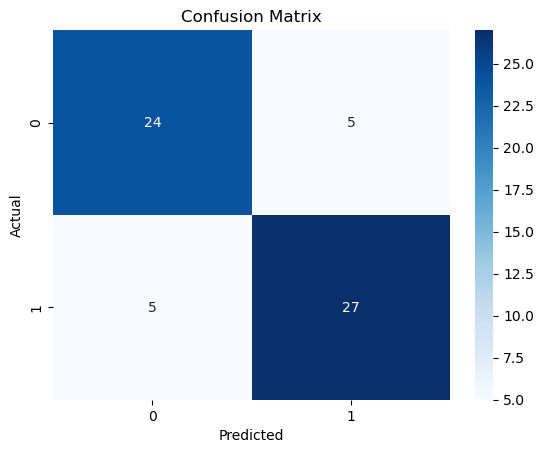

In [50]:
# Create a Confusion Matrix
CM = confusion_matrix(y_test, RFC_Predict)

# Visualize the Confusion Matrix
sns.heatmap(CM, annot=True, cmap="Blues", fmt="g")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

#### From the Confusion Matrix Visualization above, it correctly predicted 24 patients does not have heart disease, while it correctly predicted 27 patients have heart disease.
#### It also predicted 5 patients does not have heart disease when actually the patients have heart disease.

3. ### K-NEAREST NEIGHBOR

In [52]:
# Building The Model Using K-NEAREST NEIGHBORS CLASSIFIER

K_Nearest = KNeighborsClassifier()

In [53]:
K_Nearest.fit(X_train, y_train)

KNeighborsClassifier()

In [54]:
KNN_Predict = K_Nearest.predict(X_test)

In [55]:
print("K-NEAREST NEIGHBOR CLASSIFIER")
print("Accuracy", accuracy_score(y_test, KNN_Predict))
print("Precision", precision_score(y_test, KNN_Predict))
print("Recall", recall_score(y_test, KNN_Predict))
print("F1-Score", f1_score(y_test, KNN_Predict))
print("ROC-AUC", roc_auc_score(y_test, KNN_Predict))

K-NEAREST NEIGHBOR CLASSIFIER
Accuracy 0.7540983606557377
Precision 0.7931034482758621
Recall 0.71875
F1-Score 0.7540983606557377
ROC-AUC 0.755926724137931


* #### After building the model using Logistic Regression and testing, the prediction looks encouraging. The Accuracy score is %75, Precision score is %75, F1-score is %75.
* #### This is an indication our model is working fine.

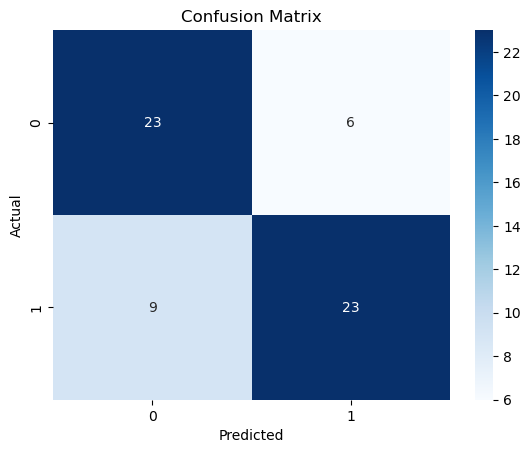

In [56]:
# Create a Confusion Matrix
CM = confusion_matrix(y_test, KNN_Predict)

# Visualize the Confusion Matrix
sns.heatmap(CM, annot=True, cmap="Blues", fmt="g")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

#### From the Confusion Matrix Visualization above, it correctly predicted 23 patients does not have heart disease, while it correctly predicted 23 patients have heart disease.
#### It also predicted 9 patients does not have heart disease when actually the patients have heart disease.

### TESTING ALL THE MODEL AT ONE GO

In [57]:
# 8 Machine Learning Algorithms will be applied to the dataset
classifiers = [#XGBClassifier(), 'XGB Calssifier'],
              [RandomForestClassifier(), 'Random Forest'],
              [SGDClassifier(), 'SGD Classifier'],
              [KNeighborsClassifier(), 'K-Nearest Neighbours'],
              [SVC(), 'SVC'],
              [GaussianNB(), 'Naive Bayes'],
              [DecisionTreeClassifier(random_state=42), 'Decision Tree'],
              [LogisticRegression(), 'Logistic Regression']
              ]

In [58]:
acc_list = {}
precision_list = {}
recall_list = {}
roc_list = {}

for classifier in classifiers:
    model = classifier [0]
    model.fit(X_train, y_train)
    model_name = classifier[1]

    pred = model.predict(X_test)

    a_score = accuracy_score(y_test, pred)
    p_score = precision_score(y_test, pred)
    r_score = recall_score(y_test, pred)
    roc_score = roc_auc_score(y_test, pred)

    acc_list[model_name] = ([str(round(a_score*100, 2)) + '%'])
    precision_list[model_name] = ([str(round(p_score*100, 2)) + '%'])
    recall_list[model_name] = ([str(round(r_score*100, 2)) + '%'])
    roc_list[model_name] = ([str(round(roc_score*100, 2)) + '%'])

    if model_name != classifiers[-1][1]:
        print('')

In [59]:
# ACCURACY SCORE
print("Accuracy Score")
s1 = pd.DataFrame(acc_list)
s1.head()

Accuracy Score


,Random Forest,SGD Classifier,K-Nearest Neighbours,SVC,Naive Bayes,Decision Tree,Logistic Regression
0,85.25%,75.41%,75.41%,65.57%,86.89%,85.25%,83.61%


In [60]:
# PRECISION SCORE
print("Precision Score")
s2 = pd.DataFrame(precision_list)
s2.head()

Precision Score


,Random Forest,SGD Classifier,K-Nearest Neighbours,SVC,Naive Bayes,Decision Tree,Logistic Regression
0,84.85%,86.96%,79.31%,65.71%,90.0%,92.59%,86.67%


In [61]:
# RECALL SCORE
print("RECALL Score")
s3 = pd.DataFrame(recall_list)
s3.head()

RECALL Score


,Random Forest,SGD Classifier,K-Nearest Neighbours,SVC,Naive Bayes,Decision Tree,Logistic Regression
0,87.5%,62.5%,71.88%,71.88%,84.38%,78.12%,81.25%


In [62]:
# ROC SCORE
print("ROC Score")
s4 = pd.DataFrame(roc_list)
s4.head()

ROC Score


,Random Forest,SGD Classifier,K-Nearest Neighbours,SVC,Naive Bayes,Decision Tree,Logistic Regression
0,85.13%,76.08%,75.59%,65.25%,87.02%,85.61%,83.73%


### Model Performance Summary
* #### From the Seven compared models that was tested, it appears the best performing model is the Naive Bayes model.
- **Best Overall**: Naive Bayes (86.89% accuracy, 90% precision, 87.02% ROC-AUC)
- **Most Precise**: Decision Tree (92.59% precision)
- **Best Recall**: Random Forest (87.5% recall)
- **Most Balanced**: Random Forest (85.25% accuracy, strong across all metrics)

### Key Insights
- Naive Bayes demonstrated superior performance for this cardiovascular dataset
- Ensemble methods (Random Forest) showed robust performance with minimal overfitting
- Linear models (Logistic Regression) provided good baseline with 83.61% accuracy
- SVC underperformed, suggesting non-linear patterns require different kernel approaches

